### Imports

In [7]:
import os

import numpy as np
import matplotlib.pyplot as plt

### Define Pose Plotter

In [8]:
def plot_poses(data_dir="KITTI_sequence_2", variation="original"):

    gt_poses_path  = os.path.join("output", os.path.basename(data_dir), variation + "_gt.npy")
    est_poses_path = os.path.join("output", os.path.basename(data_dir), variation + "_est.npy")

    gt_poses  = np.load(gt_poses_path)
    est_poses = np.load(est_poses_path)

    num_poses, _ = gt_poses.shape
    print(f"number of poses: {num_poses}")

    gt_locs = []
    est_locs = []

    for gt_pose, est_pose in zip(gt_poses, est_poses):
        gt_pose = np.reshape(gt_pose, (3, 4))
        est_pose = np.reshape(est_pose, (3, 4))
        gt_locs.append(gt_pose[:, -1])
        est_locs.append(est_pose[:, -1])

    gt_locs = np.stack(gt_locs)
    est_locs = np.stack(est_locs)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle(data_dir + " - " + variation)
    fig.set_figheight(6)
    fig.set_figwidth(12)


    ax1.plot(gt_locs[:, 0], gt_locs[:, 1], label="gt")
    ax1.plot(est_locs[:, 0], est_locs[:, 1], label="est")
    ax1.set_title('x vs y')
    ax1.legend()

    ax2.plot(gt_locs[:, 0], gt_locs[:, 2], label="gt")
    ax2.plot(est_locs[:, 0], est_locs[:, 2], label="est")
    ax2.set_title('x vs z')
    ax2.legend()

    ax3.plot(gt_locs[:, 1], gt_locs[:, 2], label="gt")
    ax3.plot(est_locs[:, 1], est_locs[:, 2], label="est")
    ax3.set_title('y vs z')    
    ax3.legend()

    return gt_locs, est_locs

### Define Errors Plotter

In [9]:
def plot_errors(gt_locs, est_locs, title=""):
   
  errs = est_locs - gt_locs
  disps = np.linalg.norm(gt_locs, axis=1)
  err_mags = np.linalg.norm(errs, axis=1)
  pct_errs = np.divide(err_mags, disps, out=np.zeros_like(disps), where=disps!=0)*100
  

  plt.plot(range(len(pct_errs)), pct_errs)
  plt.xlabel("Frame")
  plt.ylabel("Percent Displacement Error")
  plt.title(title)
  plt.show()

### Plot KITTI w/Original Pose Formulations

number of poses: 51
number of poses: 51


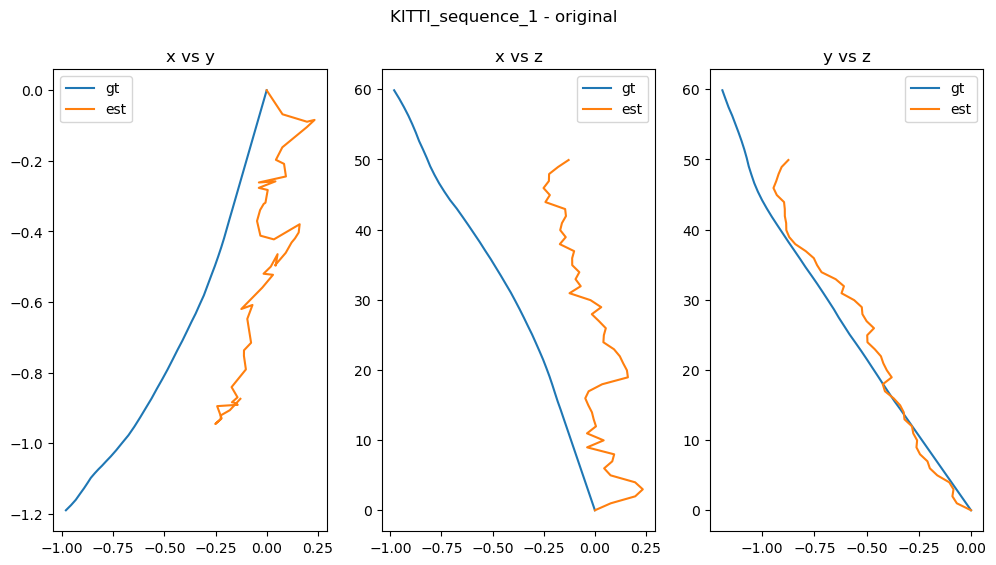

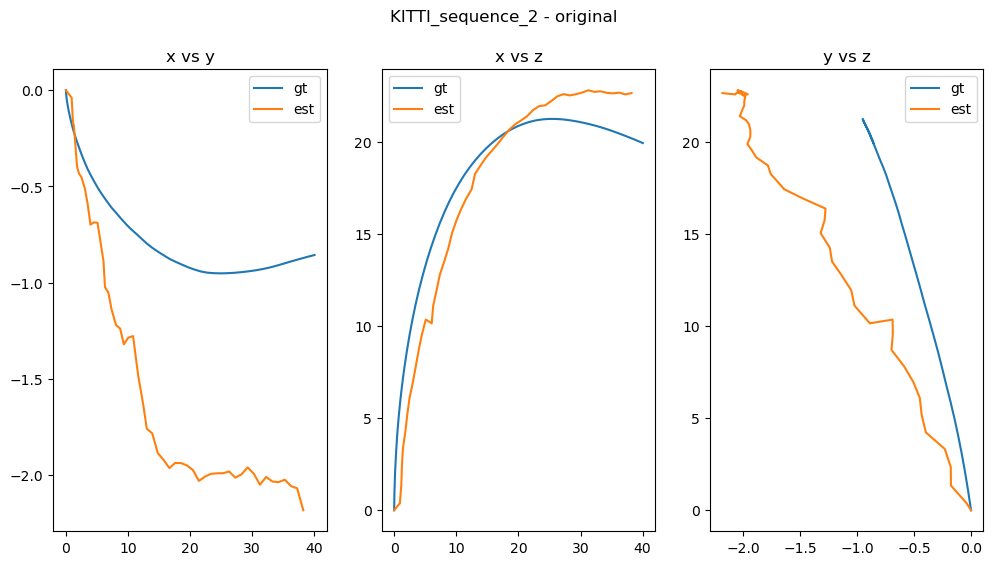

In [10]:
gt_locs_original_1, est_locs_original_1 = plot_poses("KITTI_sequence_1")
gt_locs_original_2, est_locs_original_2 = plot_poses("KITTI_sequence_2")

### Plot KITTI Errors w/Original Pose Formulations

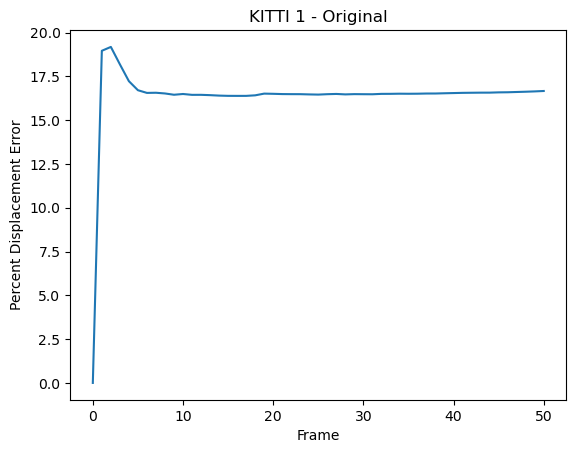

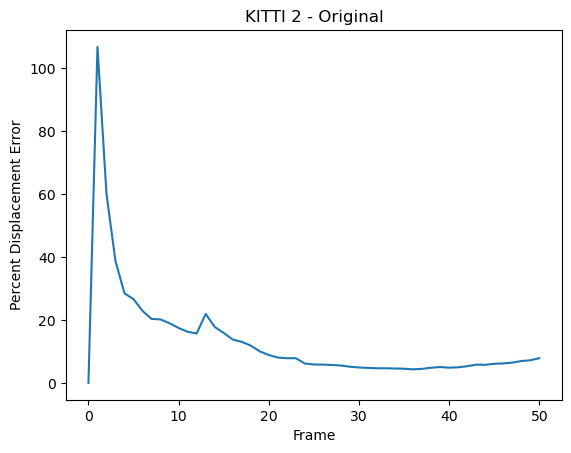

In [11]:
plot_errors(gt_locs_original_1, est_locs_original_1, "KITTI 1 - Original")
plot_errors(gt_locs_original_2, est_locs_original_2, "KITTI 2 - Original")